## Decision Trees

#### TASK 1: SETTING THE FOLDER
1. Create a Jupyter Notebook named HWA3_<student name>.ipynb.
2. Download from the CSV file named “car_evaluation.csv” from Moodle.
3. Upload the CSV file to Jupyter (Note: make sure the file is placed in the same location as your Jupyter Notebook)

#### TASK 2: IMPORT LIBRARIES & MODULES
4. Import the following libraries and modules within your notebook: panda, numpy, 
DecisionTreeClassifier (from sklearn.tree), tree (from sklearn), and metrics (from sklearn)

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

#### TASK 3: EXPLORE THE DATA
Use Python commands (e.g., head, columns, and shape) to plot the answers to the following questions:

5. Based on how many cars the algorithm will be trained and tested? (Provide a numerical answer for both train and test)
6. How many features each car is represented by? (Provide a numerical answer)
7. Which features are categorized as predictors? (Provide a verbal answer)
8. Which features are categorized as the label (target(? (Provide a verbal answer)


In [76]:
df=pd.read_csv("car_evaluation.csv" ,usecols=['buying_price', 'maintenance_price', 'num_doors', 'num_persons', 'luggage_boot', 'safety','acceptable'])
df.head(10)

,buying_price,maintenance_price,num_doors,num_persons,luggage_boot,safety,acceptable
0,3,3,1,1,3,3,0
1,3,3,1,3,1,1,0
2,2,3,4,2,3,3,1
3,4,1,1,3,2,1,0
4,4,2,3,3,1,3,1
5,1,4,2,2,3,2,1
6,4,1,4,3,3,1,0
7,2,3,2,3,2,2,1
8,4,4,4,2,1,1,0
9,3,2,3,3,1,3,1


In [77]:
df.shape

(1728, 7)

Answers ;

5. Using the 80-20 split rule , 80% of 1728 cars will be used to train and 20% of 1728 cars will be used to test the model.
6. The car has 6 features.
7. The acceptable column can be categorized as a predictor 
8. The buying price, maintenance_price,num_doors, Num_persons, Luggage_boot, safety can be categorized as labels.

In [78]:
df.dropna()

,buying_price,maintenance_price,num_doors,num_persons,luggage_boot,safety,acceptable
0,3,3,1,1,3,3,0
1,3,3,1,3,1,1,0
2,2,3,4,2,3,3,1
3,4,1,1,3,2,1,0
4,4,2,3,3,1,3,1
...,...,...,...,...,...,...,...
1723,4,2,3,2,1,2,1
1724,2,1,3,3,2,2,0
1725,2,2,1,1,2,2,0
1726,3,3,4,3,1,2,1


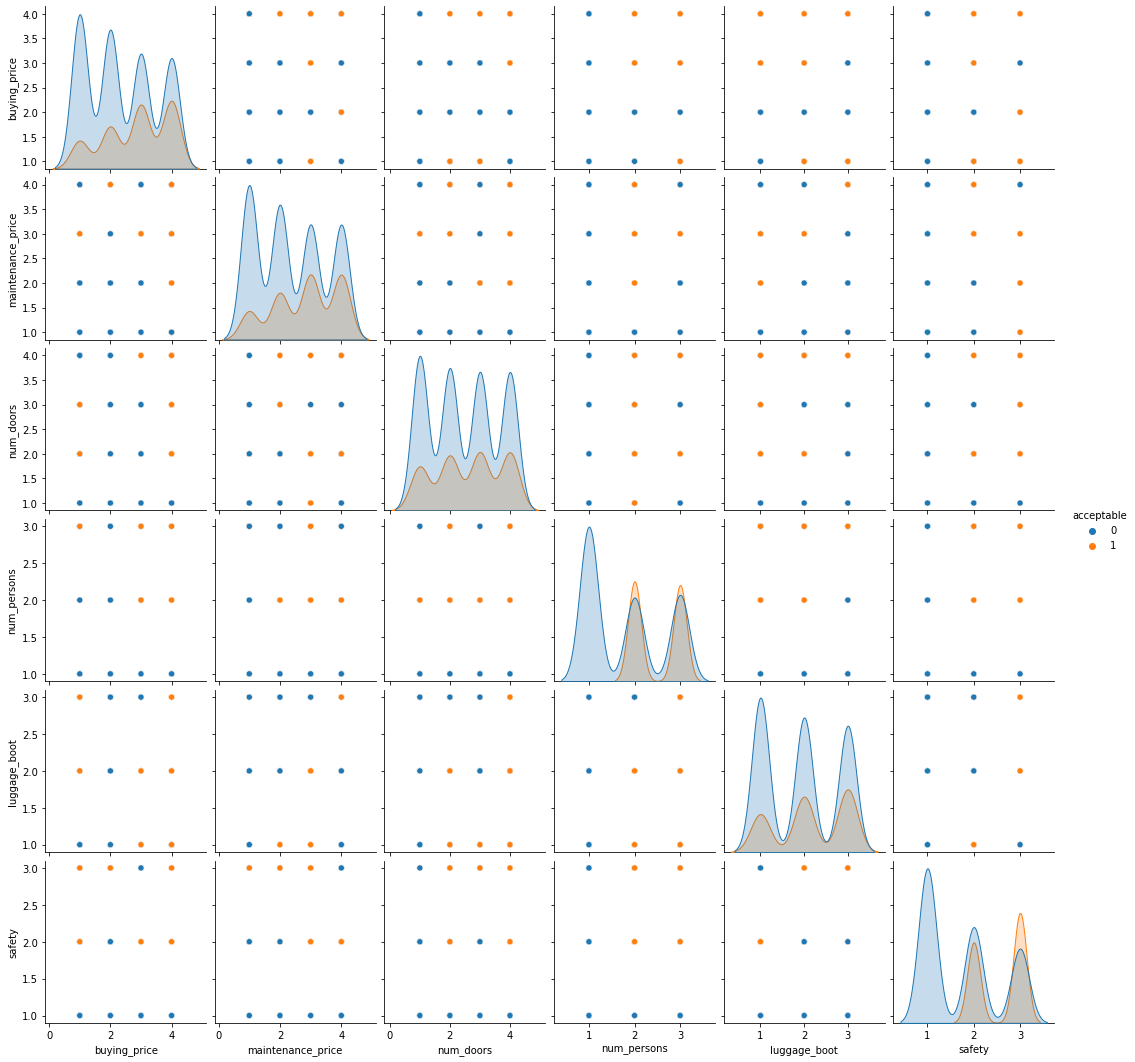

In [79]:
import seaborn as sns
sns.pairplot(data=df, hue='acceptable')
plt.show()

### PART 2: BUILDING A DECISION TREE MODEL
#### TASK 4: BUILDING THE MODEL
Use Python commands (i.e., DecisionTreeClassifier and fit) to build a Decision Tree model.
9. In next page you will see visual representation of the tree.

10. As can be seen from the decision tree, the attribute that was selected for the root of the tree is ‘Safety’. The Gini index value of this attribute is 0.416. Provide a detailed calculation of this value (Hint: You can use Excel to perform the calculation).

11. Below are three used cars offered for sale. Based on the decision tree, determine for each of them whether it will be acceptable or not (Provide a verbal answer):
- Car with a low buying price, very high maintenance price, 3 doors, 2 persons can be carried, medium luggage boot and low in safety.
- Car with a high or very high buying price, medium maintenance price, 4 doors, 4 or more persons can be carried, big luggage boot and medium or high in safety.
- Car with a medium buying, low maintenance price, 2 doors, 2 persons can be carried, small luggage boot and medium or high in safety.

In [80]:
# 10. The Gini index value of this attribute is 0.416 ,split acceptable into 1s and 0s 
ones=0
zeros=0

for i in range(len(df)):
    x = df.iloc[i,6] 
      
    if x == 0 :
        ones+=1
    else:
        zeros+=1
        
print('ones='+ str(ones)+'  '+'zeros='+str(zeros))     #ones=550  zeros=1178
        
# Gini formula
gini_left=((ones/len(df))*(1-(ones/len(df))))
gini_right=((zeros/len(df))*(1-(zeros/len(df))))
gini_aggregate=gini_left+gini_right
print(gini_aggregate)#it is approximately 0.4

ones=1210  zeros=518
0.41981470764746226


In [81]:
X = df.copy()
y = X.pop('acceptable')
print(X.shape)
print(y.shape)

(1728, 6)
(1728,)


In [82]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [83]:
model= DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [71]:
# Making Predictions with Our Model
predictions = model.predict(X_test)
print(predictions[1:])

[0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]


In [93]:
import tensorflow as tf
import numpy as np

In [104]:
#Car with a low buying price, very high maintenance price, 3 doors, 2 persons can be carried, medium luggage boot and low in safety.
'''
car1={
    'buying_price':4,
    'maintenance_price':1,
    'num_doors':2,
    'num_persons':1, 
    'luggage_boot':2,
    'safety':1,
}
'''
car1=[[4,1,2,1,2,1]]

#input_dict={name: tf.convert_to_tensor([value]) for name, value in car1.items()}
ynew = model.predict(car1)
print(ynew)


[0]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### - Car 1 has an acceptance of 0 meaning its unacceptable

In [108]:
#Car with a high or very high buying price, medium maintenance price, 4 doors, 4 or more persons can be carried, big luggage boot and medium or high in safety.
'''
car2={
    'buying_price':1,
    'maintenance_price':3,
    'num_doors':2,
    'num_persons':2, 
    'luggage_boot':3,
    'safety':3,
}
'''
car2=[[1,3,2,2,3,3]]

#input_dict={name: tf.convert_to_tensor([value]) for name, value in car1.items()}
ynew = model.predict(car2)
print(ynew)


[1]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### - Car 2 has an acceptance of 1 ,meaning its acceptable

In [109]:
#Car with a medium buying, low maintenance price, 2 doors, 2 persons can be carried, small luggage boot and medium or high in safety.
'''
car3={
    'buying_price':3,
    'maintenance_price':3,
    'num_doors':2,
    'num_persons':2, 
    'luggage_boot':3,
    'safety':3,
}
'''
car3=[[3,3,2,2,3,3]]

#input_dict={name: tf.convert_to_tensor([value]) for name, value in car1.items()}
ynew = model.predict(car3)
print(ynew)


[1]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### - Car 3 has an acceptance of 1 ,meaning its acceptable